### Review data from https://publicpay.ca.gov/Reports/RawExport.aspx

In [15]:
import sys
!{sys.executable} -m pip install pandas matplotlib pandas_profiling

import requests, zipfile
from io import BytesIO
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib
%matplotlib inline

You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# Fetch data from publicpay.ca.gov
r = requests.get('https://publicpay.ca.gov/RawExport/2018_StateDepartment.zip')

z = zipfile.ZipFile(BytesIO(r.content))
df = pd.read_csv(BytesIO(r.content), compression='zip')
print(df.columns)

Index(['Year', 'EmployerType', 'EmployerName', 'DepartmentOrSubdivision',
       'Position', 'ElectedOfficial', 'Judicial', 'OtherPositions',
       'MinPositionSalary', 'MaxPositionSalary', 'ReportedBaseWage',
       'RegularPay', 'OvertimePay', 'LumpSumPay', 'OtherPay', 'TotalWages',
       'DefinedBenefitPlanContribution', 'EmployeesRetirementCostCovered',
       'DeferredCompensationPlan', 'HealthDentalVision',
       'TotalRetirementAndHealthContribution', 'PensionFormula', 'EmployerURL',
       'EmployerPopulation', 'LastUpdatedDate', 'EmployerCounty',
       'SpecialDistrictActivities', 'IncludesUnfundedLiability',
       'SpecialDistrictType'],
      dtype='object')


### Top 20 Employer Types

<AxesSubplot:>

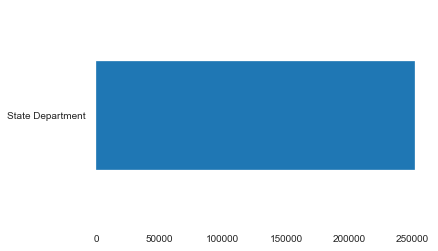

In [26]:
df['EmployerType'].value_counts()[0:20].plot(kind='barh')

### Top 20 Employers

<AxesSubplot:>

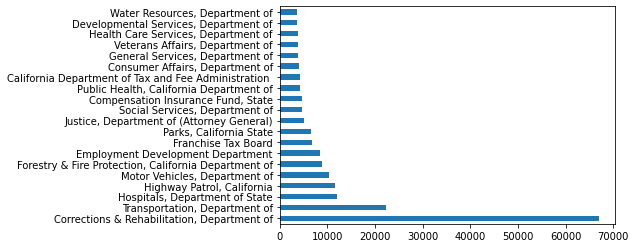

In [13]:
df['EmployerName'].value_counts()[0:20].plot(kind='barh')

### Profiling Report

In [21]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)


### Top 40 Roles

<AxesSubplot:>

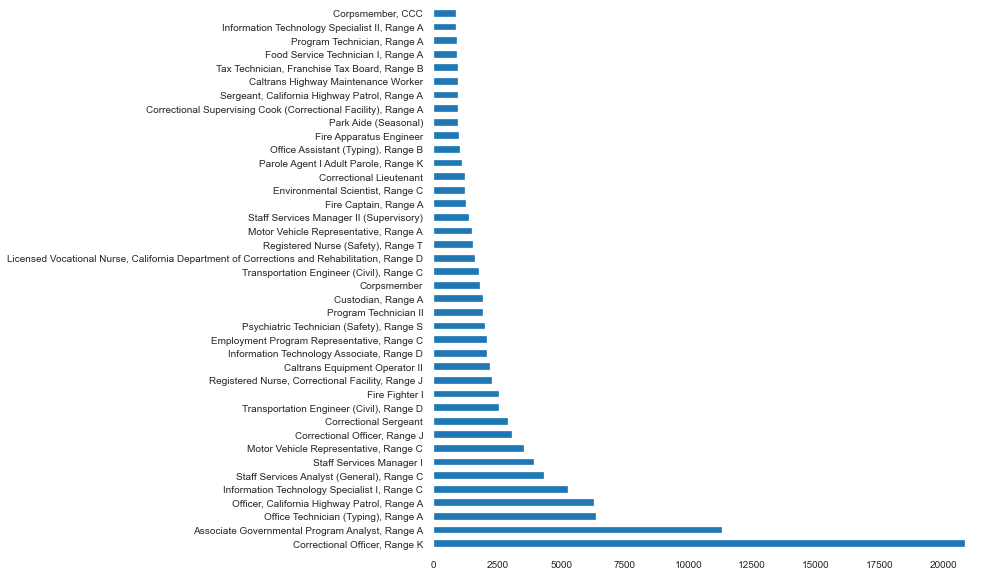

In [19]:
df['Position'].value_counts()[0:40].plot(kind='barh', figsize=(10,10))